In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading database with all results

In [23]:
df =  pd.read_csv("../results_models/all_results/CISIA-ALL-Experiments-1ANO-ARTIGO.csv")
df = df[~df['PRODUCT'].isin(['gasolinadeaviacao', 'oleocombustivel', 'queroseneiluminante'])]

df_time_moe = pd.read_excel("../Time-MoE/results_model_local/results_time_moe_last_year.xlsx")
df_time_moe = df_time_moe[df_time_moe['TYPE_PREDICTIONS'].isin(['zeroshot', 'fine_tuning_indiv'])]

df_timefm = pd.read_excel("../TimesFM/notebooks/results_model_local/times_fm_results_last_year.xlsx")
df_morai = pd.read_excel("../Morai/results_model_local/morai_results_last_year.xlsx")

df_lstm = pd.read_excel("../LSTM/results_model_local/lstm_results_pytorch.xlsx") 
df_beats = pd.read_excel("../N-BEATS/results_model_local/nbeats_results.xlsx")

df_combined = pd.concat([df_lstm, df_beats, df_time_moe, df_timefm, df_morai], ignore_index=True)

/tmp/ipykernel_1863640/1102516531.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv("../results_models/all_results/CISIA-ALL-Experiments-1ANO-ARTIGO.csv")


In [24]:
# Dicionário de renomeação
rename_dict = {
    'TimesFM_fine_tuning_indiv': 'TimesFM_fine_tuning_indiv',
    'Chronos_INDIV': 'Chronos_fine_tuning_indiv',
    'LagLlama_INDIV': 'LagLlama_fine_tuning_indiv',
    'TimeMoE_fine_tuning_indiv': 'TimeMoE_fine_tuning_indiv',
    'Chronos_GLOBAL': 'Chronos_fine_tuning_global',
    'LagLlama_GLOBAL': 'LagLlama_fine_tuning_global',
    'TimeMoE_fine_tuning_global': 'TimeMoE_fine_tuning_global',
    'LagLlama_PRODUCT': 'LagLlama_fine_tuning_product',
    'Chronos_PRODUCT': 'Chronos_fine_tuning_product',
    'LSTM_LSTM_recursive': 'LSTM',
    'LagLlama_ZS': 'LagLlama_zeroshot',
    'Chronos_ZS': 'Chronos_zeroshot',
    np.nan: 'N-BEATS'

}

# Aplicar renomeação
df['GRANU'] = df['GRANU'].replace(rename_dict)

## Analysis of results

### Zero-Shot 

In [25]:
filtered_df = df[df['GRANU'].str.endswith(('_ZS', '_zeroshot')) & (df['GRANU'] != 'TimeGPT_ZS')]

In [26]:
# filtered_df = filtered_df[filtered_df['PRODUCT'] == 'etanolhidratado']
# filtered_df = filtered_df[filtered_df['PRODUCT'] == 'gasolinac']

In [27]:
filtered_df['PRODUCT'].unique().tolist()

['etanolhidratado', 'gasolinac', 'glp', 'oleodiesel', 'querosenedeaviacao']

In [28]:
df_ranked = filtered_df.sort_values(by=["PRODUCT", "UF", "RRMSE"]).groupby(["PRODUCT", "UF"]).head(5)

df_ranked["rank"] = df_ranked.groupby(["PRODUCT", "UF"])["MAPE"].rank(method="first")

rank_count = df_ranked.groupby(["MODEL", "rank"]).size().unstack(fill_value=0)

print(rank_count)


rank      1.0  2.0  3.0  4.0  5.0
MODEL                            
Chronos    55   59   60   71   73
LagLlama   16    4    2    3    3
Morai       3    2    3    5    7
TimeMoE    28   34   34   27   28
TimesFM    33   36   36   29   24


/tmp/ipykernel_1863640/1934376310.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['PRODUCT'] = filtered_df['PRODUCT'].replace(derivados)


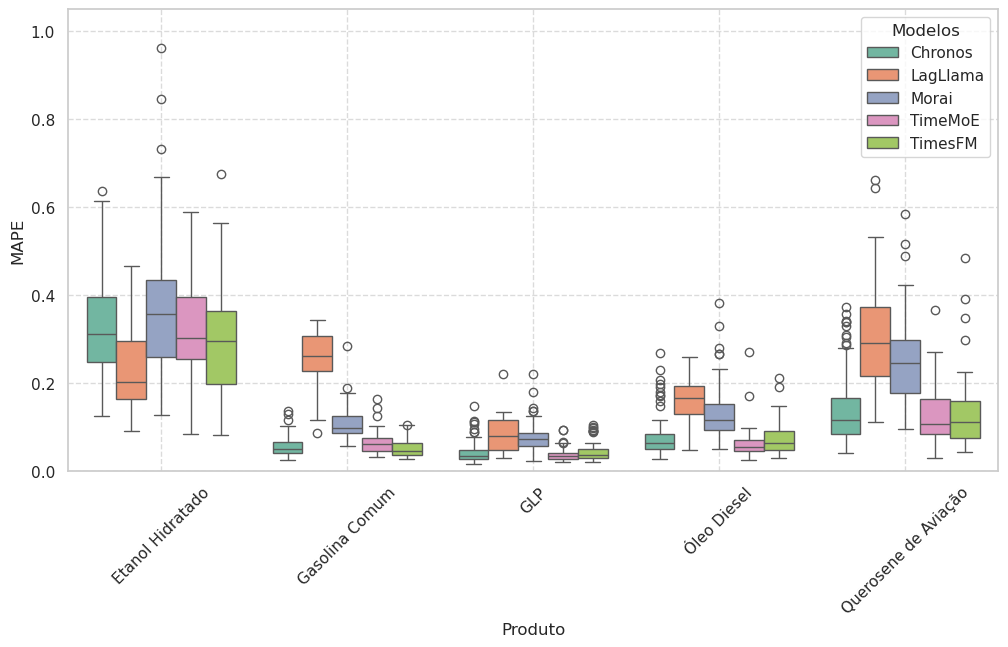

In [29]:
derivados = {
    'etanolhidratado': 'Etanol Hidratado',
    'gasolinac': 'Gasolina Comum',
    'glp': 'GLP',
    'oleodiesel': 'Óleo Diesel',
    'querosenedeaviacao': 'Querosene de Aviação'
}

filtered_df['PRODUCT'] = filtered_df['PRODUCT'].replace(derivados)

plt.figure(figsize=(12, 6))
sns.boxplot(x="PRODUCT", y="MAPE", hue="MODEL", data=filtered_df)
plt.xlabel("Produto")
plt.ylabel("MAPE")
plt.legend(title="Modelos")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0, 1.05)
plt.show()

### FineTune

In [30]:
df

,PRODUCT,UF,EXP,MODEL,PARAMETERS,GRANU,INFO,CLASS,MAPE,POCID,...,P57,P58,P59,P60,context_length,num_samples,batch_size,lr,max_epochs,PARAMETERS_FINE_TUNING
0,etanolhidratado,ac,Exp0,ARIMA,Best,Est_Indiv,Exp0ARIMABestEst_Indiv,0-EST,0.374330,63.636360,...,551.123860,594.391552,482.600827,415.164919,NaN,NaN,NaN,NaN,NaN,NaN
1,etanolhidratado,al,Exp0,ARIMA,Best,Est_Indiv,Exp0ARIMABestEst_Indiv,0-EST,0.180660,45.454550,...,4622.958352,5165.710476,4985.565133,4819.107348,NaN,NaN,NaN,NaN,NaN,NaN
2,etanolhidratado,am,Exp0,ARIMA,Best,Est_Indiv,Exp0ARIMABestEst_Indiv,0-EST,0.319410,45.454550,...,9373.740157,9065.476319,7875.249538,9276.634548,NaN,NaN,NaN,NaN,NaN,NaN
3,etanolhidratado,ap,Exp0,ARIMA,Best,Est_Indiv,Exp0ARIMABestEst_Indiv,0-EST,0.437950,54.545450,...,15.227960,33.745842,15.185812,12.061546,NaN,NaN,NaN,NaN,NaN,NaN
4,etanolhidratado,ba,Exp0,ARIMA,Best,Est_Indiv,Exp0ARIMABestEst_Indiv,0-EST,0.155050,36.363640,...,36234.741120,40602.002830,40047.672080,35825.791180,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33795,etanolhidratado,ce,EXP1,TimesFM,TimesFM_500M,TimesFM_fine_tuning_indiv,NaN,2-DL,0.515043,27.272727,...,6080.614000,5994.132000,6578.938000,6350.154000,NaN,NaN,NaN,NaN,NaN,"{'lr': 1e-07, 'epochs': 50, 'batch_size': 16}"
33796,gasolinac,ce,EXP1,TimesFM,TimesFM_500M,TimesFM_fine_tuning_indiv,NaN,2-DL,0.346219,54.545455,...,83030.016000,83412.610000,82236.360000,82688.340000,NaN,NaN,NaN,NaN,NaN,"{'lr': 0.0001, 'epochs': 5, 'batch_size': 16}"
33798,glp,ce,EXP1,TimesFM,TimesFM_500M,TimesFM_fine_tuning_indiv,NaN,2-DL,0.069952,72.727273,...,41348.348000,41252.670000,40861.168000,40775.203000,NaN,NaN,NaN,NaN,NaN,"{'lr': 1e-06, 'epochs': 20, 'batch_size': 32}"
33800,oleodiesel,ce,EXP1,TimesFM,TimesFM_500M,TimesFM_fine_tuning_indiv,NaN,2-DL,0.282726,36.363636,...,68549.070000,67742.400000,67296.270000,66348.484000,NaN,NaN,NaN,NaN,NaN,"{'lr': 1e-06, 'epochs': 80, 'batch_size': 32}"


In [31]:
df['GRANU'].unique().tolist()

['Est_Indiv',
 'Reg_Indiv',
 'Chronos_zeroshot',
 'LagLlama_zeroshot',
 'TimeGPT_ZS',
 'Chronos_fine_tuning_global',
 'LagLlama_fine_tuning_global',
 'Chronos_fine_tuning_product',
 'LagLlama_fine_tuning_product',
 'Chronos_fine_tuning_indiv',
 'LagLlama_fine_tuning_indiv',
 'LSTM',
 'N-BEATS',
 'Morai_zeroshot',
 'TimeMoE_zeroshot',
 'TimeMoE_fine_tuning_indiv',
 'TimeMoE_fine_tuning_global',
 'TimeMoE_fine_tuning_product',
 'TimesFM_zeroshot',
 'TimesFM_fine_tuning_indiv']

In [32]:
# Filtro
df_final = df[df['GRANU'].isin([
    'Chronos_zeroshot',
    'LagLlama_zeroshot',
    'Chronos_fine_tuning_global',
    'LagLlama_fine_tuning_global',
    'Chronos_fine_tuning_product',
    'LagLlama_fine_tuning_product',
    'Chronos_fine_tuning_indiv',
    'LagLlama_fine_tuning_indiv',
    'LSTM',
    'N-BEATS',
    'Morai_zeroshot',
    'TimeMoE_zeroshot',
    'TimeMoE_fine_tuning_indiv',
    'TimeMoE_fine_tuning_global',
    'TimeMoE_fine_tuning_product',
    'TimesFM_zeroshot',
    'TimesFM_fine_tuning_indiv'
])].copy()

In [33]:
derivados = {
    'etanolhidratado': 'Etanol Hidratado',
    'gasolinac': 'Gasolina Comum',
    'glp': 'GLP',
    'oleodiesel': 'Óleo Diesel',
    'querosenedeaviacao': 'Querosene de Aviação'
}

df_final['PRODUCT'] = df_final['PRODUCT'].replace(derivados)

In [34]:
# df_final = df_final[df_final["GRANU"].isin(["Chronos_fine_tuning_product", "LagLlama_fine_tuning_product", 'TimeMoE_fine_tuning_product'])]

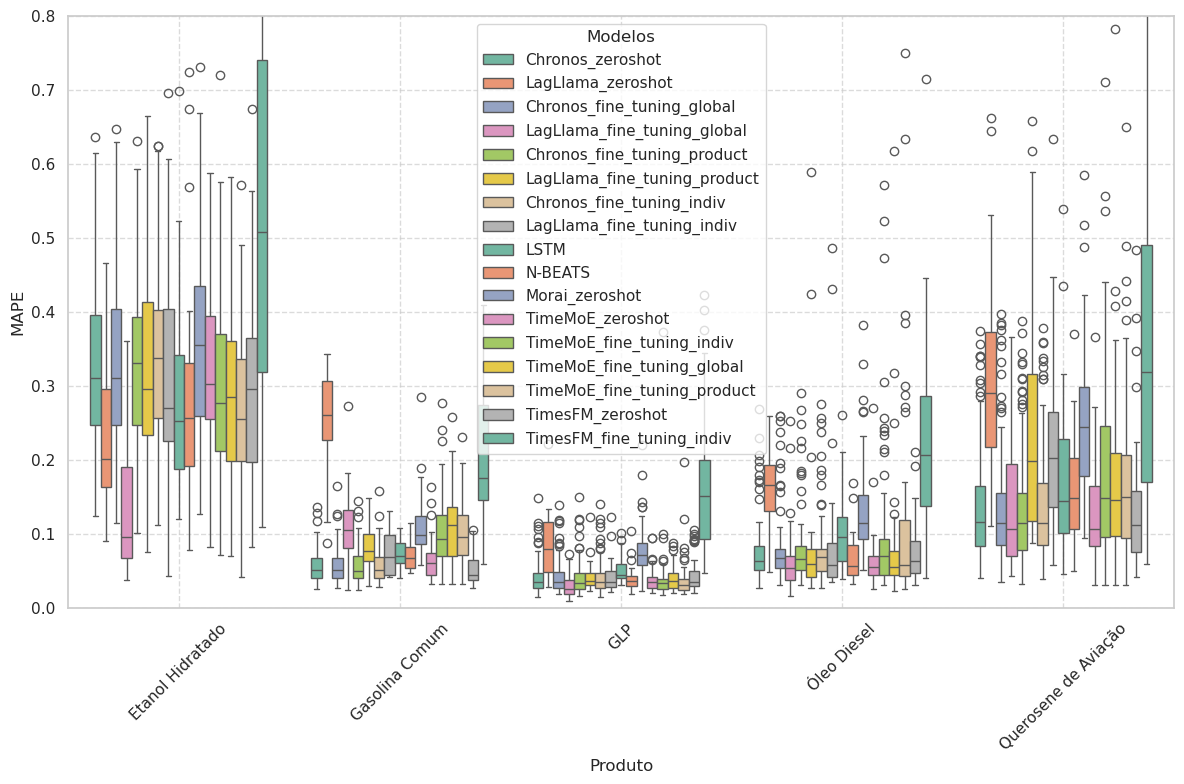

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ["Etanol Hidratado", "Gasolina Comum", "GLP", "Óleo Diesel", "Querosene de Aviação"]

plt.figure(figsize=(12, 8))
sns.boxplot(
    x="PRODUCT", 
    y="MAPE", 
    hue="GRANU", 
    data=df_final, 
    order=order,
    palette="Set2"  # Paleta mais agradável visualmente
)
plt.xlabel("Produto")
plt.ylabel("MAPE")
plt.legend(title="Modelos")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0, 0.8)
plt.tight_layout()
plt.show()


## Statistical Models

In [36]:
import pandas as pd
import glob
import os

base_dir = "../results_models/statistical_models"

pattern = os.path.join(base_dir, "**", "transform_*.csv")
csv_files = glob.glob(pattern, recursive=True)

df_list = []

for file in csv_files:
    try:
        df = pd.read_csv(file, sep=';')
        df_list.append(df)
    except Exception as e:
        print(f"Erro ao ler o arquivo {file}: {e}")

if df_list:
    df_all = pd.concat(df_list, ignore_index=True)
    df_filtered = df_all[df_all['train_range'] == '1990-01_2023-02']
    
    print(df_filtered)
else:
    print("Nenhum arquivo CSV encontrado.")


          train_range       test_range  UF     PRODUCT  MODEL  \
0     1990-01_2023-02  2023-03_2024-02  RJ         glp    ETS   
6     1990-01_2023-02  2023-03_2024-02  CE         glp    ETS   
12    1990-01_2023-02  2023-03_2024-02  AM         glp    ETS   
18    1990-01_2023-02  2023-03_2024-02  SE         glp    ETS   
24    1990-01_2023-02  2023-03_2024-02  MS         glp    ETS   
...               ...              ...  ..         ...    ...   
5860  1990-01_2023-02  2023-03_2024-02  SP  oleodiesel  ARIMA   
5876  1990-01_2023-02  2023-03_2024-02  MG  oleodiesel  ARIMA   
5892  1990-01_2023-02  2023-03_2024-02  MA  oleodiesel  ARIMA   
5908  1990-01_2023-02  2023-03_2024-02  SC  oleodiesel  ARIMA   
5924  1990-01_2023-02  2023-03_2024-02  MT  oleodiesel  ARIMA   

                                                 PARAMS  WINDOW  HORIZON  \
0     {'trend': 'add', 'seasonal': 'add', 'seasonal_...      12       12   
6     {'trend': 'add', 'seasonal': 'add', 'seasonal_...      12    

In [37]:
derivados = {
    'etanolhidratado': 'Etanol Hidratado',
    'gasolinac': 'Gasolina Comum',
    'glp': 'GLP',
    'oleodiesel': 'Óleo Diesel',
    'querosenedeaviacao': 'Querosene de Aviação'
}

df_filtered['PRODUCT'] = df_filtered['PRODUCT'].replace(derivados)

/tmp/ipykernel_1863640/1935611083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['PRODUCT'] = df_filtered['PRODUCT'].replace(derivados)


In [38]:
df_filtered = df_filtered[~df_filtered["MODEL"].isin(["RIDGE"])]

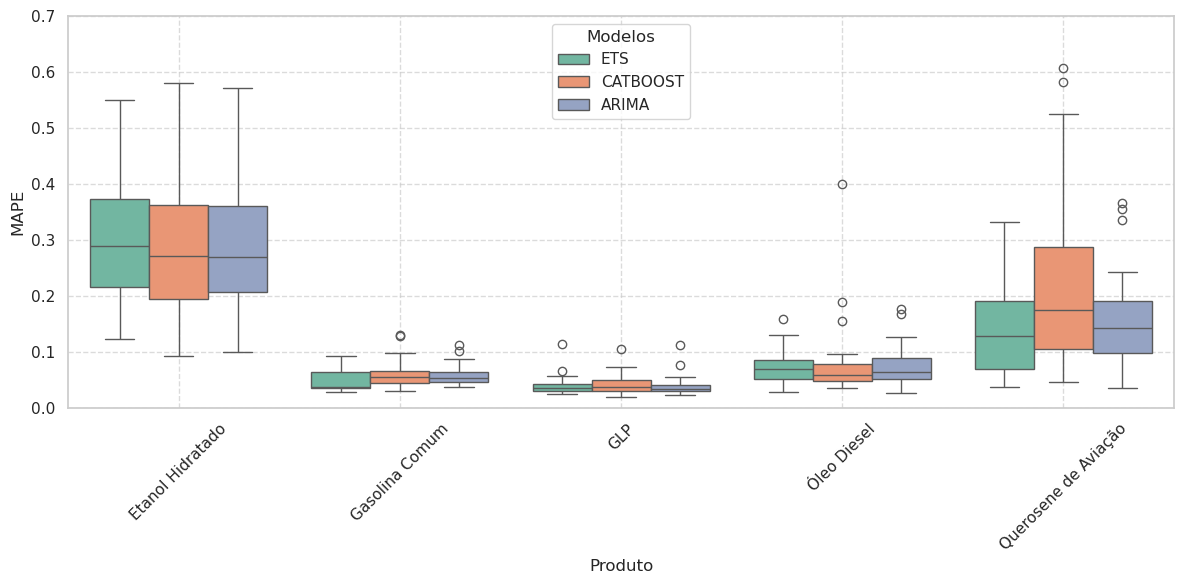

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ["Etanol Hidratado", "Gasolina Comum", "GLP", "Óleo Diesel", "Querosene de Aviação"]

plt.figure(figsize=(12, 6))
sns.boxplot(
    x="PRODUCT", 
    y="MAPE", 
    hue="MODEL", 
    data=df_filtered, 
    order=order,
    palette="Set2"  # Paleta mais agradável visualmente
)
plt.xlabel("Produto")
plt.ylabel("MAPE")
plt.legend(title="Modelos")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()


In [40]:
# Renomear a coluna 'MODEL' para 'GRANU' em df_filtered
df_filtered = df_filtered.rename(columns={'MODEL': 'GRANU'})

# Concatenar os dois dataframes
df_final = pd.concat([df_final, df_filtered], ignore_index=True)

In [41]:
# df_final['GRANU'] = df_final['GRANU'].str.replace(
#     r'(_fine_tuning)_(global|product|indiv)$',
#     r'\1',
#     regex=True
# )


Produto: Etanol Hidratado
Melhor modelo: LagLlama_fine_tuning_global (mediana = 0.0961)
           Modelo  Mediana  Diferença Abs
 Chronos_zeroshot   0.3112         0.2151
LagLlama_zeroshot   0.2021         0.1059
   Morai_zeroshot   0.3561         0.2600
 TimeMoE_zeroshot   0.3026         0.2065
 TimesFM_zeroshot   0.2960         0.1999


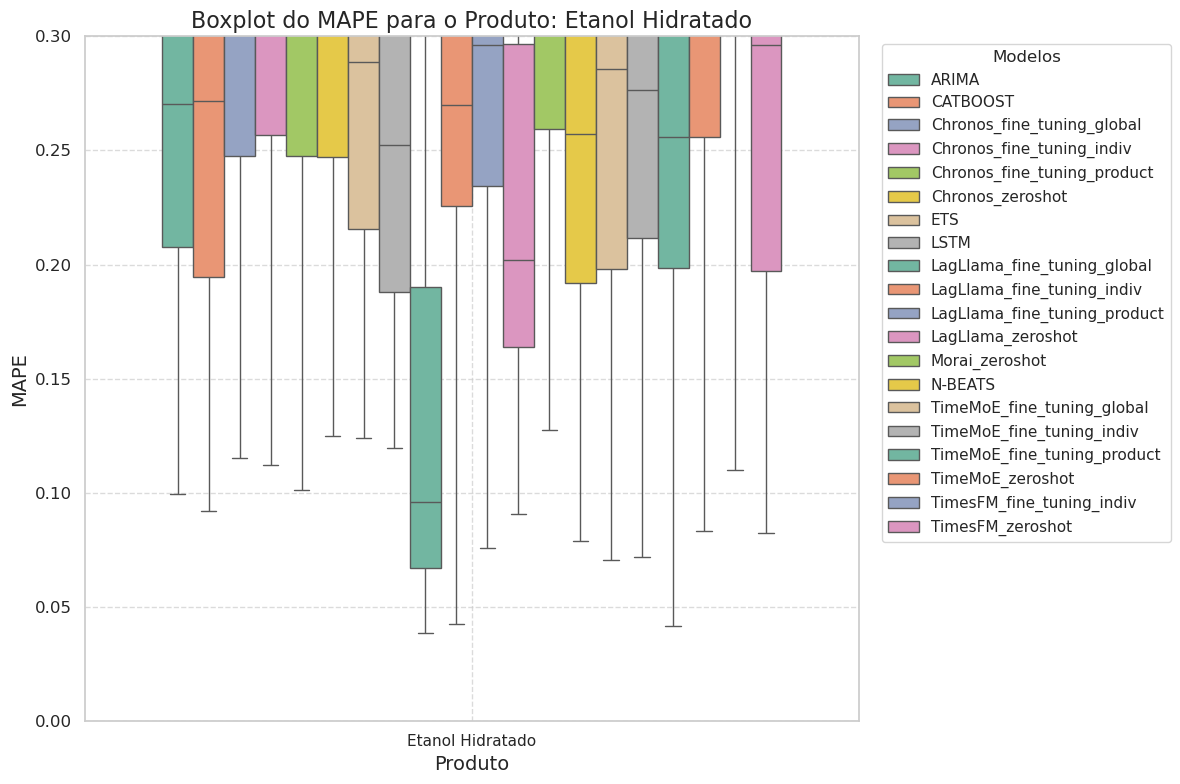


Produto: GLP
Melhor modelo: LagLlama_fine_tuning_global (mediana = 0.0264)
           Modelo  Mediana  Diferença Abs
 Chronos_zeroshot   0.0354         0.0090
LagLlama_zeroshot   0.0794         0.0530
   Morai_zeroshot   0.0721         0.0457
 TimeMoE_zeroshot   0.0350         0.0086
 TimesFM_zeroshot   0.0355         0.0091


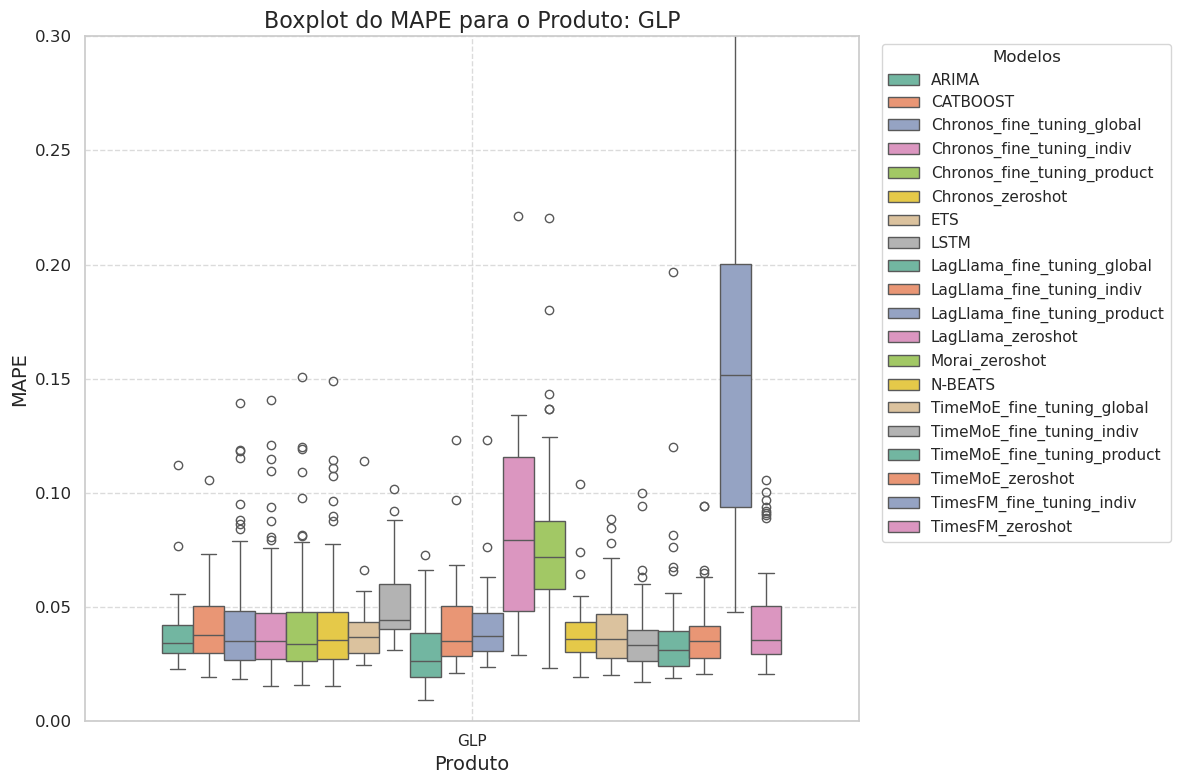


Produto: Gasolina Comum
Melhor modelo: ETS (mediana = 0.0382)
           Modelo  Mediana  Diferença Abs
 Chronos_zeroshot   0.0509         0.0127
LagLlama_zeroshot   0.2610         0.2228
   Morai_zeroshot   0.0989         0.0607
 TimeMoE_zeroshot   0.0606         0.0224
 TimesFM_zeroshot   0.0453         0.0071


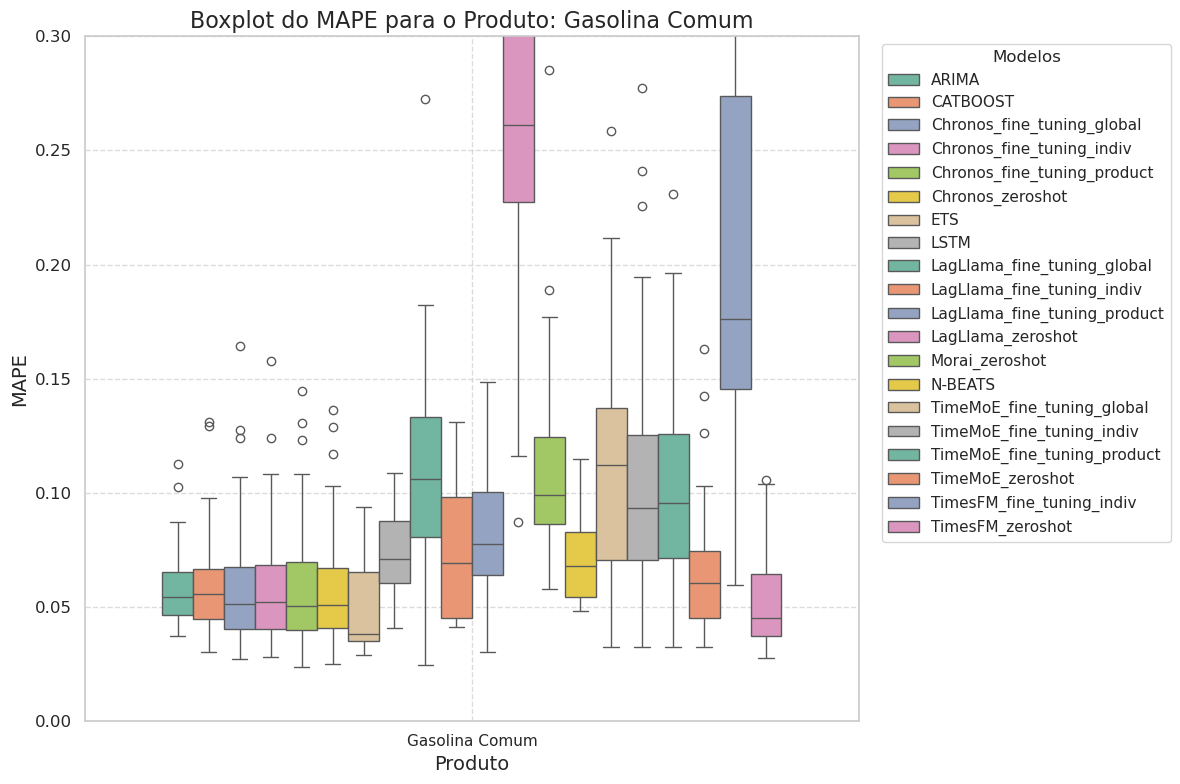


Produto: Querosene de Aviação
Melhor modelo: TimeMoE_zeroshot (mediana = 0.1062)
           Modelo  Mediana  Diferença Abs
 Chronos_zeroshot   0.1169         0.0107
LagLlama_zeroshot   0.2911         0.1848
   Morai_zeroshot   0.2448         0.1385
 TimeMoE_zeroshot   0.1062         0.0000
 TimesFM_zeroshot   0.1123         0.0060


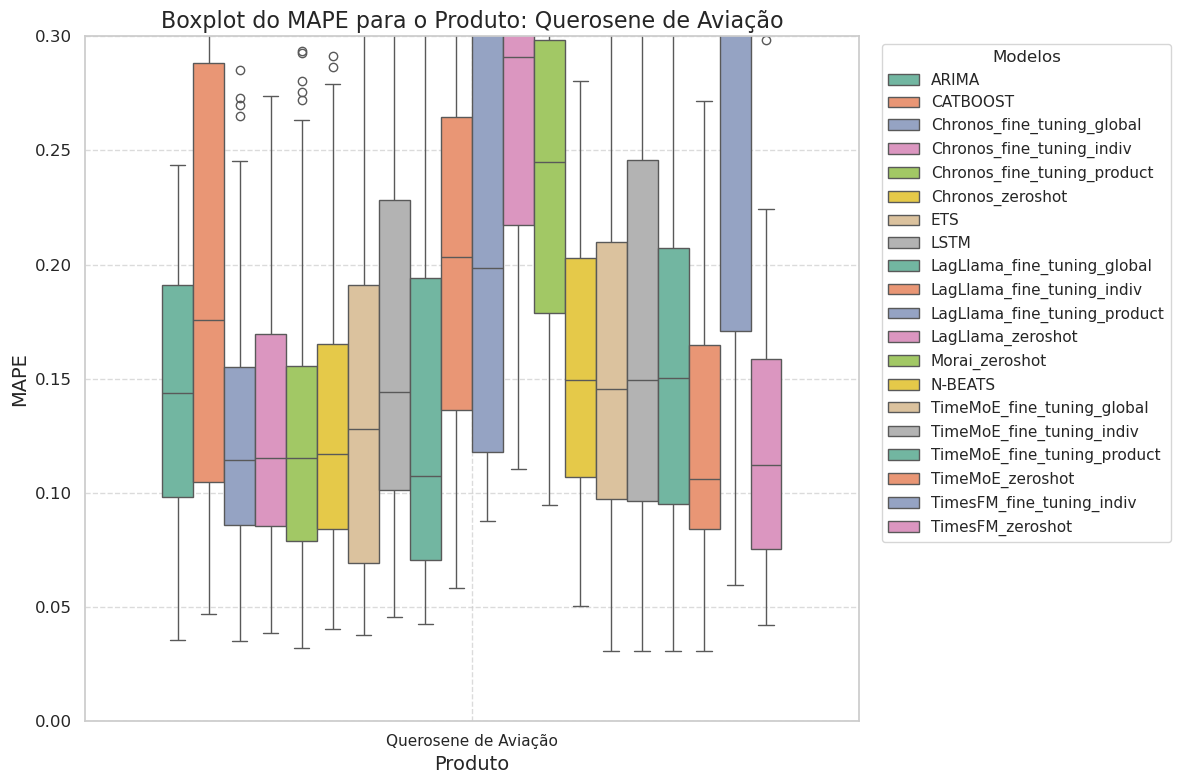


Produto: Óleo Diesel
Melhor modelo: LagLlama_fine_tuning_global (mediana = 0.0544)
           Modelo  Mediana  Diferença Abs
 Chronos_zeroshot   0.0636         0.0092
LagLlama_zeroshot   0.1657         0.1113
   Morai_zeroshot   0.1153         0.0609
 TimeMoE_zeroshot   0.0549         0.0005
 TimesFM_zeroshot   0.0642         0.0098


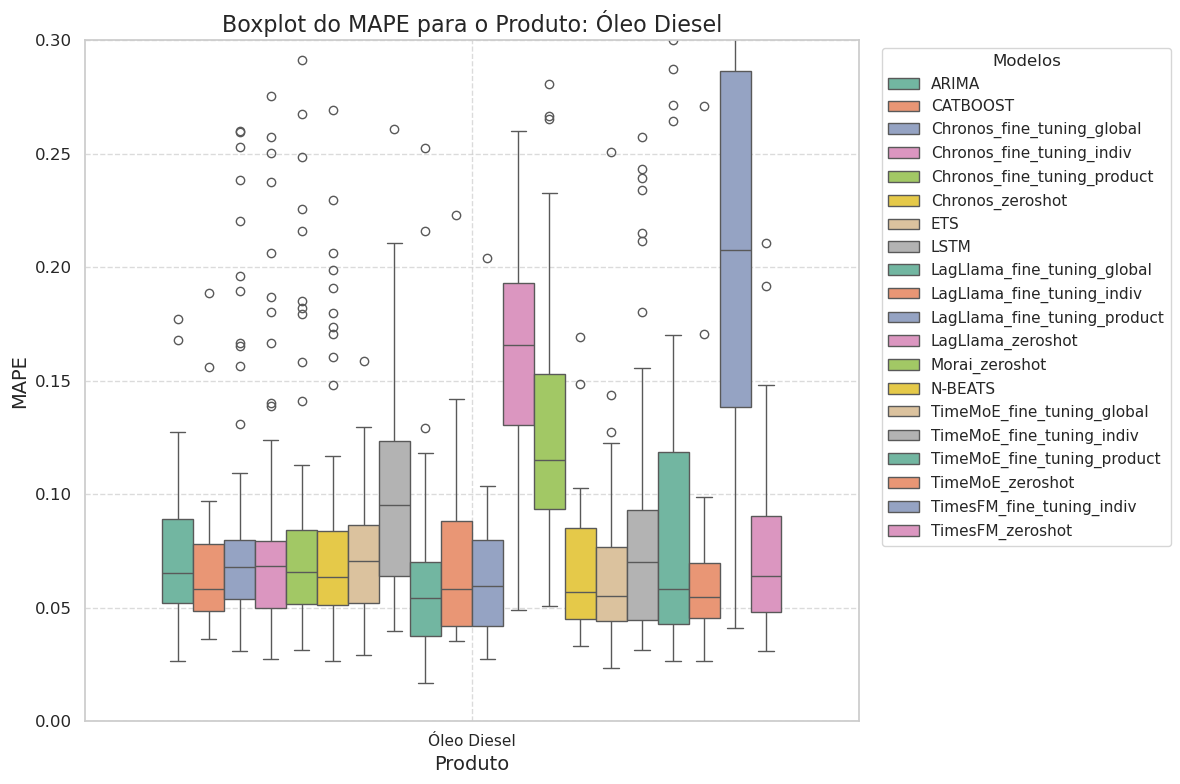

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuração de estilo
sns.set(style="whitegrid", palette="Set2")

# Modelos de referência para comparar perdas
modelos_ref = [
    'Chronos_zeroshot',
    'LagLlama_zeroshot',
    'Morai_zeroshot',
    'TimeMoE_zeroshot',
    'TimesFM_zeroshot',
]

# Lista ordenada de produtos
produtos_ordenados = sorted(df_final['PRODUCT'].dropna().unique())

for produto in produtos_ordenados:
    # Filtra dados pelo produto
    df_filtrado = df_final[df_final['PRODUCT'] == produto]
    if df_filtrado.empty:
        continue

    # 1. Calcula mediana de MAPE por modelo
    medianas = df_filtrado.groupby('GRANU')['MAPE'].median()

    # 2. Identifica o melhor modelo (menor mediana)
    best_model = medianas.idxmin()
    best_median = medianas.min()

    # 3. Calcula perdas absolutas e relativas para modelos de referência
    perdas = []
    for m in modelos_ref:
        if m in medianas.index:
            med = medianas.loc[m]
            delta_abs = med - best_median
            delta_rel = 100 * delta_abs / best_median if best_median != 0 else None
        else:
            med = None
            delta_abs = None
            delta_rel = None
        perdas.append({
            'Modelo': m,
            'Mediana': med,
            'Diferença Abs': delta_abs,
        })

    # 4. Cria DataFrame de perdas
    df_perdas = pd.DataFrame(perdas)

    # Exibe resultado
    print(f"\nProduto: {produto}")
    print(f"Melhor modelo: {best_model} (mediana = {best_median:.4f})")
    print(df_perdas.to_string(index=False, float_format='%.4f'))

    # Plot do boxplot de MAPE por modelo
    plt.figure(figsize=(12, 8))
    sns.boxplot(
        x='PRODUCT',
        y='MAPE',
        hue='GRANU',
        data=df_filtrado,
        order=[produto],
        hue_order=sorted(df_filtrado['GRANU'].dropna().unique()),
        palette='Set2'
    )
    plt.title(f"Boxplot do MAPE para o Produto: {produto}", fontsize=16)
    plt.xlabel("Produto", fontsize=14)
    plt.ylabel("MAPE", fontsize=14)
    plt.legend(title="Modelos", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.ylim(0, 0.3)
    plt.tight_layout()
    plt.show()


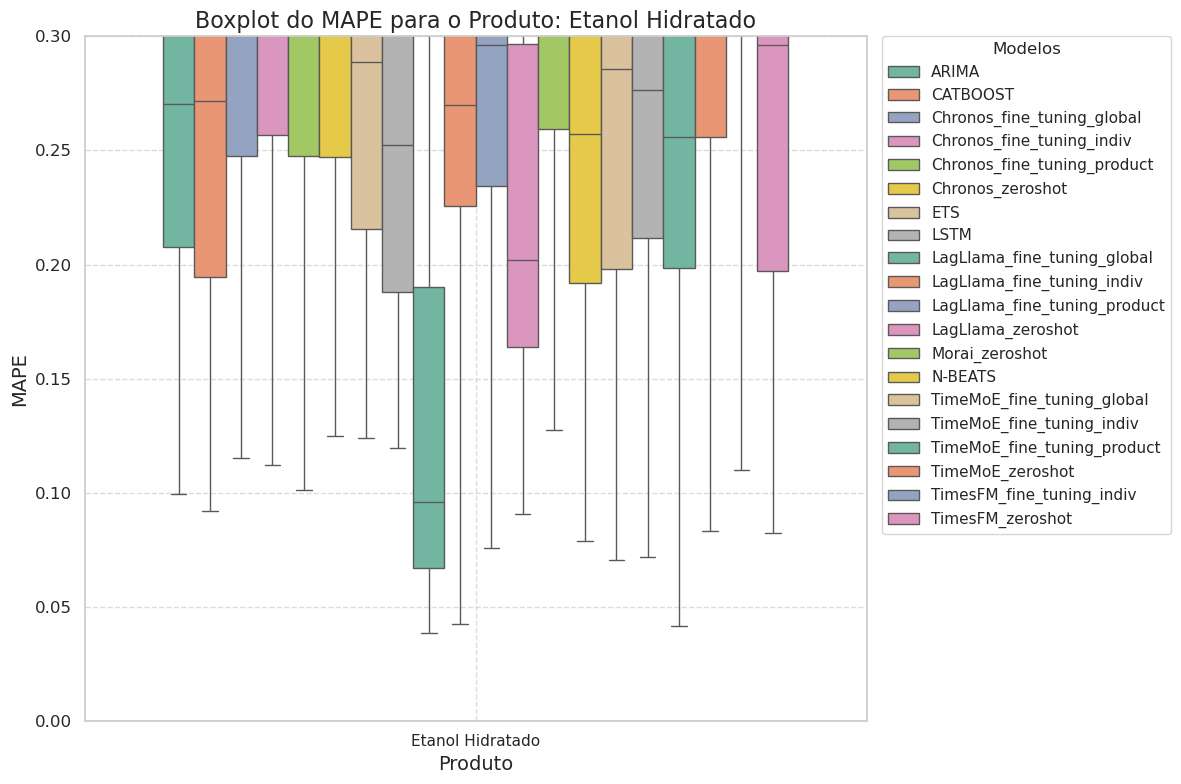

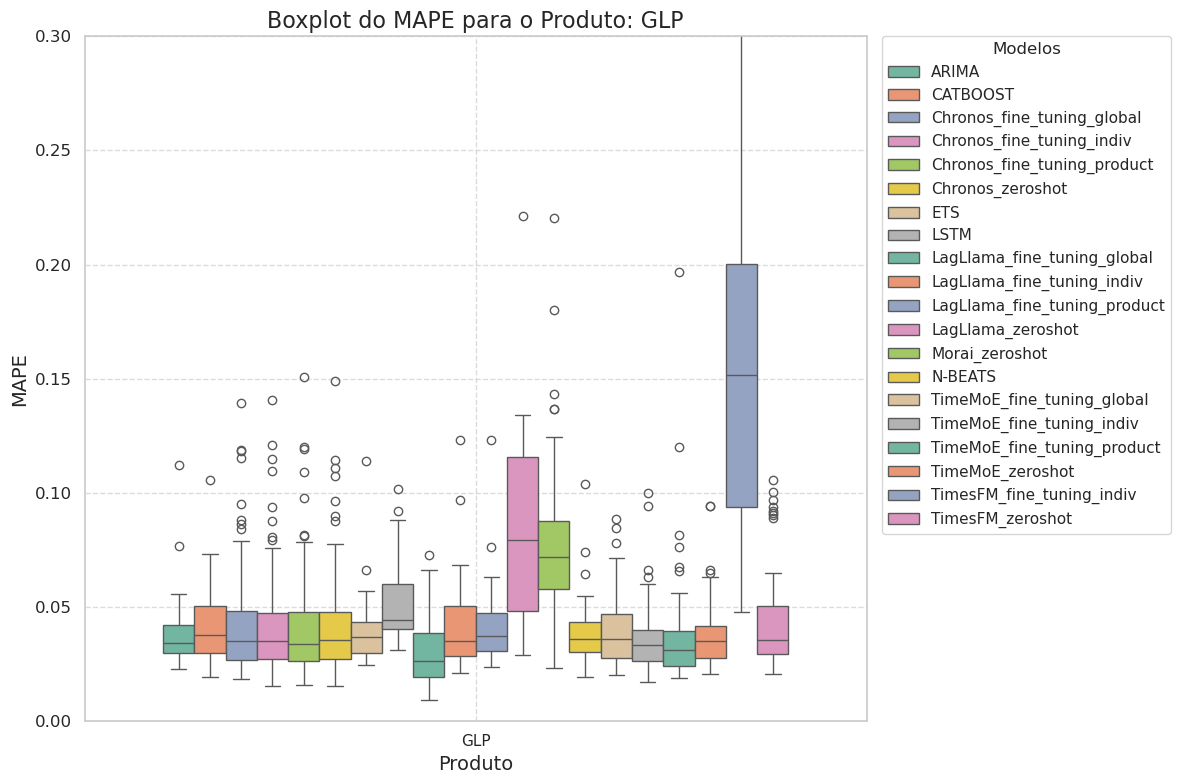

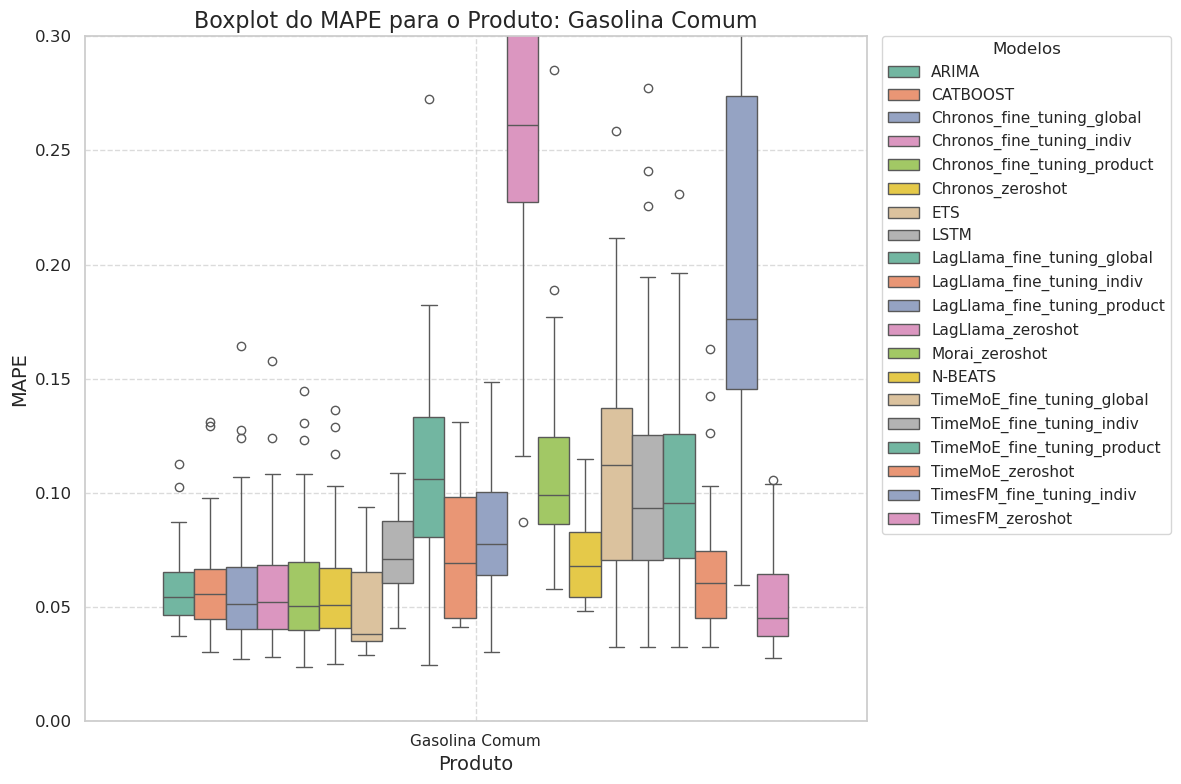

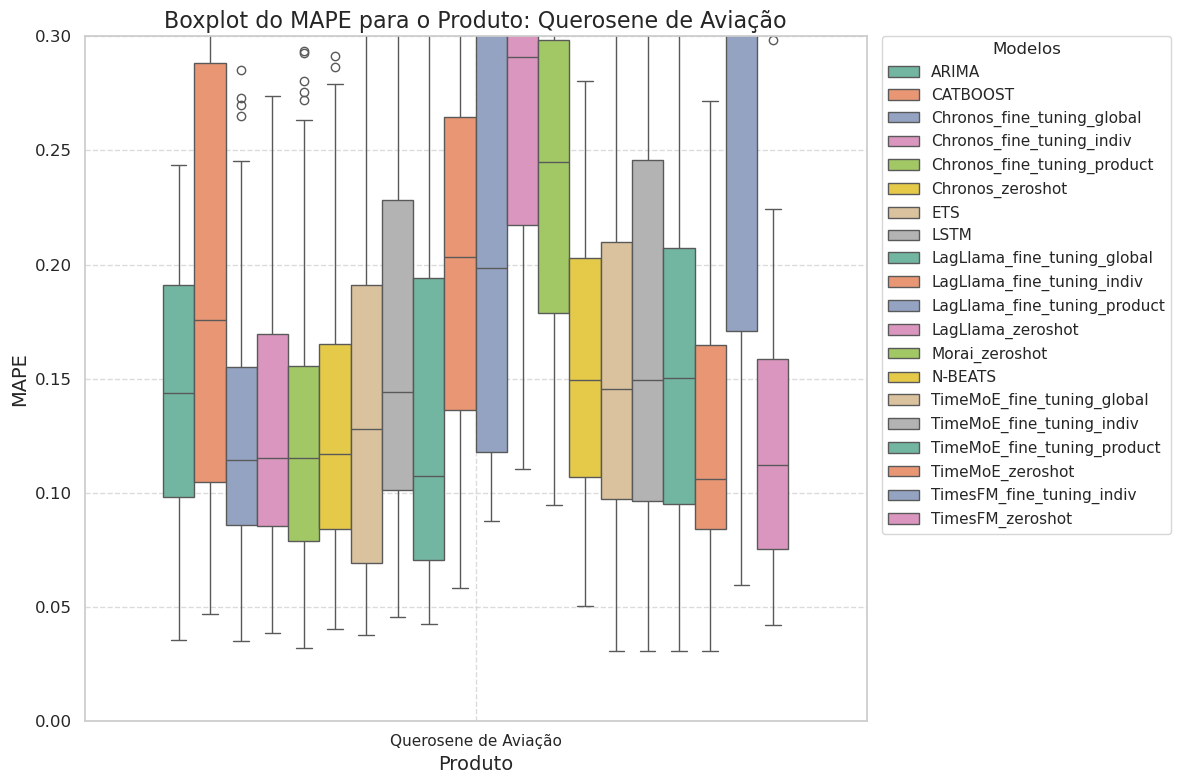

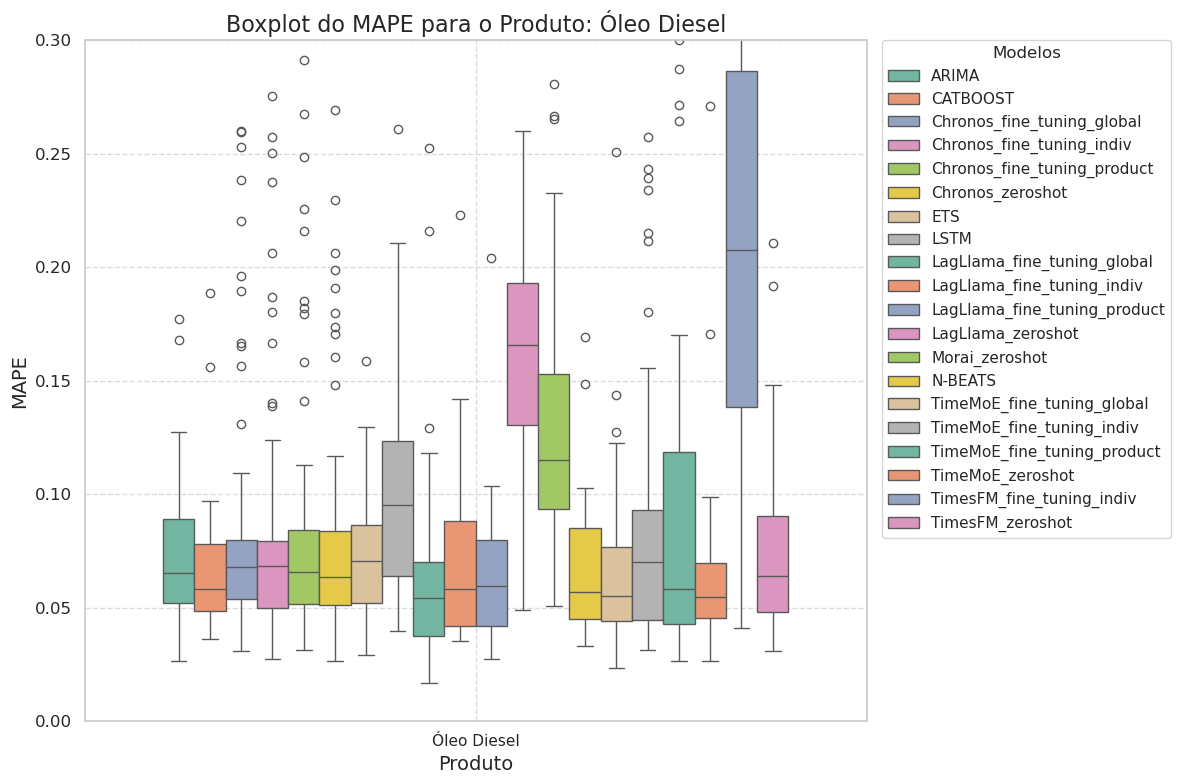

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo bonito do seaborn
sns.set(style="whitegrid", palette="Set2")

# Lista de produtos únicos, ordenada
produtos_ordenados = sorted(df_final['PRODUCT'].dropna().unique())

# Loop para cada produto
for produto in produtos_ordenados:
    df_filtrado = df_final[df_final["PRODUCT"] == produto]

    if df_filtrado.empty:
        continue

    # Ordena os modelos (GRANU)
    modelos_ordenados = sorted(df_filtrado['GRANU'].dropna().unique())

    plt.figure(figsize=(12, 8))
    
    sns.boxplot(
        x="PRODUCT", 
        y="MAPE", 
        hue="GRANU", 
        data=df_filtrado,
        order=[produto],
        hue_order=modelos_ordenados,
        palette="Set2"
    )

    plt.title(f"Boxplot do MAPE para o Produto: {produto}", fontsize=16)
    plt.xlabel("Produto", fontsize=14)
    plt.ylabel("MAPE", fontsize=14)
    plt.legend(title="Modelos", bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.ylim(0, 0.3)
    plt.tight_layout()
    plt.show()

## Correlation

In [ ]:
def plot_correlations(df):
    for product, group in df.groupby("PRODUCT"):
        model_series = {}

        for model, model_group in group.groupby("MODEL"):
            pred_values = model_group[['P' + str(i) for i in range(49, 61)]].values.flatten()

            pred_values = pred_values[~np.isnan(pred_values)]

            if len(pred_values) > 0:
                model_series[model] = pred_values

        model_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in model_series.items()])).fillna(0)

        print(model_df)

        correlation_matrix = model_df.corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f'Correlação entre Modelos - {product}')
        plt.xlabel("Modelos")
        plt.ylabel("Modelos")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.show()


In [ ]:
plot_correlations(filtered_df)